In [46]:
#Import libraries
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import  TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [60]:

#Scrapping the tweets - Create a list to append tweet data
tweets_list = []
maxTweets = 5000

#Using TwitterSearchScraper to scrape data and append tweets to list 
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('spotify since:2022-01-01 until:{today}').get_items()):
    if i == maxTweets:
        break
    tweets_list.append([tweet.rawContent])

#Creating a dataframe from the tweets list above

tweets_to_df = pd.DataFrame(tweets_list, columns=["Tweets"])

tweets_to_df.head() #list first five tweets


,Tweets
0,"💀 no fr cuz Spotify shuffling is weird, i thin..."
1,KA SLAY didn’t notice until today na d-2 ug mo...
2,#ChatGPT overall i have been impressed by Chat...
3,"When they cover TMD - City ,, i listen to that..."
4,Spotify's algorithm has successfully kept chil...


In [61]:
#clean the tweets with a function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #remove @mentions
    text = re.sub('#', '', text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+', '',text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n',' ', text)
    return text

In [62]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleanTweet function to the tweet
tweets_to_df.head() #compares original theets with cleaned tweets

,Tweets,cleanedTweets
0,"💀 no fr cuz Spotify shuffling is weird, i thin...","💀 no fr cuz Spotify shuffling is weird, i thin..."
1,KA SLAY didn’t notice until today na d-2 ug mo...,KA SLAY didn’t notice until today na d-2 ug mo...
2,#ChatGPT overall i have been impressed by Chat...,ChatGPT overall i have been impressed by ChatG...
3,"When they cover TMD - City ,, i listen to that...","When they cover TMD - City ,, i listen to that..."
4,Spotify's algorithm has successfully kept chil...,Spotify's algorithm has successfully kept chil...


In [63]:
#save results in .csv file
tweets_to_df.to_csv('tweets_ChatGPT.csv') #write dataframe into csv file
savedTweets = pd.read_csv('../Sentiment_Data/tweets_ChatGPT.csv', index_col=0) #read csv file
savedTweets.shape
savedTweets

,Tweets,cleanedTweets
0,"💀 no fr cuz Spotify shuffling is weird, i thin...","💀 no fr cuz Spotify shuffling is weird, i thin..."
1,KA SLAY didn’t notice until today na d-2 ug mo...,KA SLAY didn’t notice until today na d-2 ug mo...
2,#ChatGPT overall i have been impressed by Chat...,ChatGPT overall i have been impressed by ChatG...
3,"When they cover TMD - City ,, i listen to that...","When they cover TMD - City ,, i listen to that..."
4,Spotify's algorithm has successfully kept chil...,Spotify's algorithm has successfully kept chil...
...,...,...
595,I never realised how much I love Halsey until ...,I never realised how much I love Halsey until ...
596,PLS GUE MAU GANTI LAGU SPOTIFY RECAP BUKAN AFR...,PLS GUE MAU GANTI LAGU SPOTIFY RECAP BUKAN AFR...
597,WAIT HOW DID I NOT SEE THIS UNTIL TODAY WHEN I...,WAIT HOW DID I NOT SEE THIS UNTIL TODAY WHEN I...
598,I listened to the entire interview and it was ...,I listened to the entire interview and it was ...


In [64]:
#Using library Textblob to detect the subjectivity or polarity 
#Get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets columns

,cleanedTweets,Subjectivity,Polarity
0,"💀 no fr cuz Spotify shuffling is weird, i thin...",0.583333,-0.333333
1,KA SLAY didn’t notice until today na d-2 ug mo...,0.000000,0.000000
2,ChatGPT overall i have been impressed by ChatG...,0.425000,0.075000
3,"When they cover TMD - City ,, i listen to that...",0.600000,-0.200000
4,Spotify's algorithm has successfully kept chil...,0.475000,0.375000


In [66]:
#Create a function to check negative, neutral and positive analysis.

def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)
savedTweets.drop('Tweets', axis=1).head()

,cleanedTweets,Subjectivity,Polarity,Analysis
0,"💀 no fr cuz Spotify shuffling is weird, i thin...",0.583333,-0.333333,Negative
1,KA SLAY didn’t notice until today na d-2 ug mo...,0.000000,0.000000,Neutral
2,ChatGPT overall i have been impressed by ChatG...,0.425000,0.075000,Positive
3,"When they cover TMD - City ,, i listen to that...",0.600000,-0.200000,Negative
4,Spotify's algorithm has successfully kept chil...,0.475000,0.375000,Positive


In [67]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
2,#ChatGPT overall i have been impressed by Chat...,ChatGPT overall i have been impressed by ChatG...,0.425000,0.075000,Positive
4,Spotify's algorithm has successfully kept chil...,Spotify's algorithm has successfully kept chil...,0.475000,0.375000,Positive
5,"@tompzaa Very interesting indeed, I couldn't r...","Very interesting indeed, I couldn't really fi...",0.425000,0.425000,Positive
10,A week after my own souls warning by the kille...,A week after my own souls warning by the kille...,0.700000,0.250000,Positive
12,Lollipop by Lil. Wayne just happened to appear...,Lollipop by Lil. Wayne just happened to appear...,0.050000,0.150000,Positive
...,...,...,...,...,...
592,I haaaaaattteeeeee rose Stan that attack Lisa....,I haaaaaattteeeeee rose Stan that attack Lisa....,0.770000,0.200000,Positive
594,@502eire I have never used Spotify until today...,I have never used Spotify until today. Thanks...,0.200000,0.250000,Positive
595,I never realised how much I love Halsey until ...,I never realised how much I love Halsey until ...,0.638636,0.284091,Positive
598,I listened to the entire interview and it was ...,I listened to the entire interview and it was ...,0.556250,0.250000,Positive


In [68]:

#shows the counts of tweets'polarity
savedTweets['Analysis'].value_counts()

Positive    322
Neutral     166
Negative    112
Name: Analysis, dtype: int64

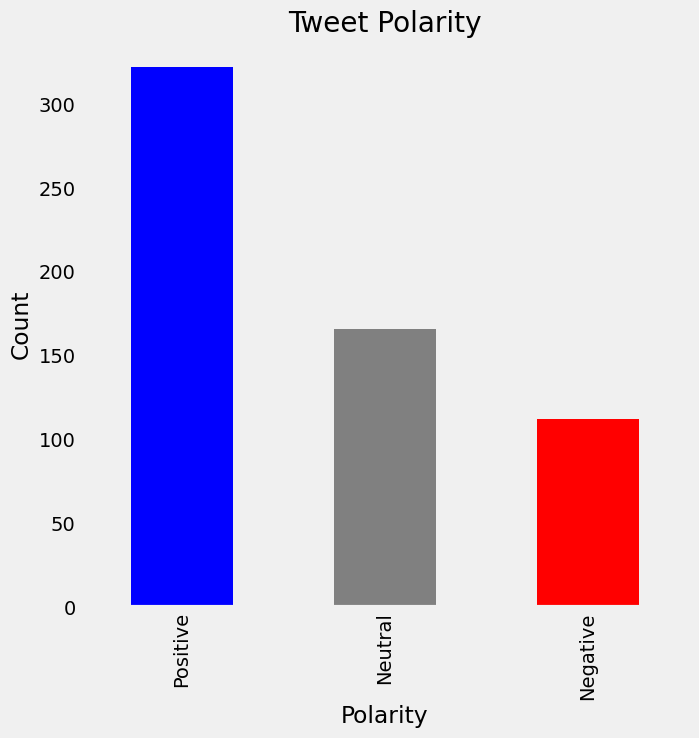

In [82]:
#I decide to plot a bar graph and pie chart for each polarity, you can choose any one of you preferences.
#Bar graph
fig = plt.figure(figsize=(7,7))
color = ['blue','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar', color = color)
plt.title('Tweet Polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of Polarity')

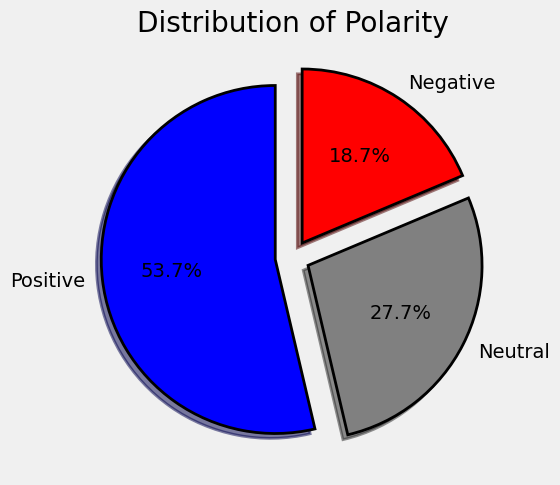

In [76]:

#Pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(5,7))
colors = ('blue', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors,
          startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of Polarity')

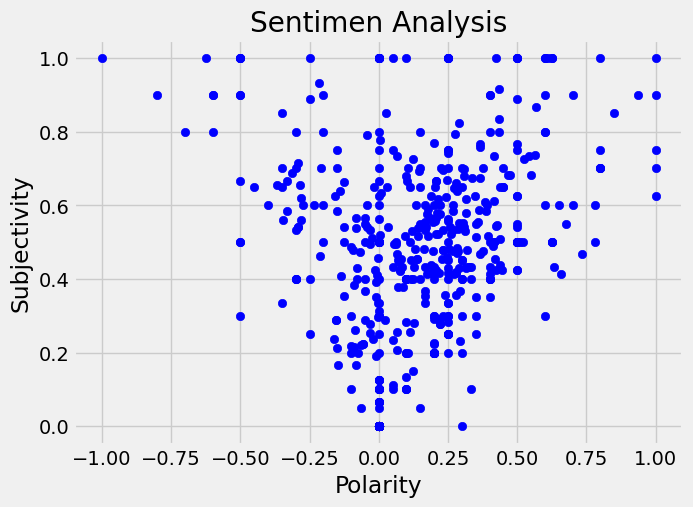

In [78]:
#Plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(7,5))
for i in range (0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentimen Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [73]:
savedTweets.shape[0]#shows total rows of tweets

600

In [74]:
#Get the percentage of positive tweets
nTweets = savedTweets[savedTweets['Analysis']=='Positive']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of positive tweets: {0}%'.format(percentage))

Percentage of positive tweets: 53.7%


In [75]:
#get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100,1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 18.7%
